In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train=pd.read_csv("../../datasets/stock price prediction/Google_Stock_Price_Train.csv")
df_test=pd.read_csv("../../datasets/stock price prediction/Google_Stock_Price_Test.csv")

In [3]:
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
df_train['Volume'] = df_train['Volume'].str.replace(',', '').astype(float)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   float64
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


In [6]:
x=df_train[['Open','High','Low','Volume']]

In [7]:
df_train['Volume']

0        7380500.0
1        5749400.0
2        6590300.0
3        5405900.0
4       11688800.0
           ...    
1253      623400.0
1254      789100.0
1255     1153800.0
1256      744300.0
1257     1770000.0
Name: Volume, Length: 1258, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)
x_train_scaled=scaler.transform(x)

In [9]:
x_train_scaled.shape

(1258, 4)

In [10]:
x_train_scaled

array([[0.08581368, 0.09640129, 0.09044931, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.07056868]])

In [14]:
rows=[]
y_train=[]
for i in range(1198):#(1258 rows-60 days)
    row=x_train_scaled[i:60+i,:]
    rows.append(row)
    y_train.append(x_train_scaled[60+i,:])
x_train=np.array(rows)
y_train=np.array(y_train)
x_train.shape,y_train.shape

((1198, 60, 4), (1198, 4))

In [15]:
x_train[0]

array([[0.08581368, 0.09640129, 0.09044931, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.26361233],
       [0.09156187, 0.08881917, 0.08800576, 0.21617942],
       [0.07984225, 0.07671765, 0.06106986, 0.46779736],
       [0.0643277 , 0.06444805, 0.05697833, 0.35306768],
       [0.0585423 , 0.06033951, 0.06095621, 0.19262715],
       [0.06568569, 0.063589  , 0.06603273, 0.15044053],
       [0.06109085, 0.05806114, 0.06089938, 0.18517821],
       [0.06639259, 0.06274861, 0.0652561 , 0.15317982],
       [0.0614257 , 0.06463481, 0.06190332, 0.22171005],
       [0.07474514, 0.07113377, 0.07071147, 0.50660392],
       [0.02797827, 0.02463257, 0.0237536 , 0.84997597],
       [0.02379269, 0.02244757, 0.02513638, 0.27406488],
       [0.02409033, 0.02153249, 0.02026822, 0.24535443],
       [0.0159238 , 0.01318468, 0.00930065, 0.40067281],
       [0.01078949, 0.00926289, 0.00757691, 0.25905487],
       [0.00967334, 0.01469737,

In [16]:
x_train.reshape(x_train.shape[0],x_train.shape[1],4)
#x_train=x_train.reshape(1198,60,4)

array([[[0.08581368, 0.09640129, 0.09044931, 0.29525831],
        [0.09701243, 0.09834351, 0.09823458, 0.22993592],
        [0.09433366, 0.09251685, 0.09408623, 0.26361233],
        ...,
        [0.07846566, 0.07903337, 0.0783452 , 0.14593512],
        [0.08034452, 0.08276841, 0.08330808, 0.16105326],
        [0.08497656, 0.08751191, 0.08921806, 0.20379656]],

       [[0.09701243, 0.09834351, 0.09823458, 0.22993592],
        [0.09433366, 0.09251685, 0.09408623, 0.26361233],
        [0.09156187, 0.08881917, 0.08800576, 0.21617942],
        ...,
        [0.08034452, 0.08276841, 0.08330808, 0.16105326],
        [0.08497656, 0.08751191, 0.08921806, 0.20379656],
        [0.08627874, 0.08564439, 0.08283452, 0.15438526]],

       [[0.09433366, 0.09251685, 0.09408623, 0.26361233],
        [0.09156187, 0.08881917, 0.08800576, 0.21617942],
        [0.07984225, 0.07671765, 0.06106986, 0.46779736],
        ...,
        [0.08497656, 0.08751191, 0.08921806, 0.20379656],
        [0.08627874, 0.085644

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import LSTM,Dense

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1], 4)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(40,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error')

In [22]:
model.fit(x_train,y_train,batch_size=32,epochs=64)

Epoch 1/64
38/38 [==============================] - 10s 90ms/step - loss: 0.0600
Epoch 2/64
38/38 [==============================] - 3s 70ms/step - loss: 0.0521
Epoch 3/64
38/38 [==============================] - 3s 73ms/step - loss: 0.0516
Epoch 4/64
38/38 [==============================] - 3s 70ms/step - loss: 0.0513
Epoch 5/64
38/38 [==============================] - 3s 74ms/step - loss: 0.0504
Epoch 6/64
38/38 [==============================] - 3s 68ms/step - loss: 0.0503
Epoch 7/64
38/38 [==============================] - 3s 68ms/step - loss: 0.0501
Epoch 8/64
38/38 [==============================] - 3s 68ms/step - loss: 0.0494
Epoch 9/64
38/38 [==============================] - 3s 67ms/step - loss: 0.0495
Epoch 10/64
38/38 [==============================] - 3s 69ms/step - loss: 0.0496
Epoch 11/64
38/38 [==============================] - 3s 68ms/step - loss: 0.0496
Epoch 12/64
38/38 [==============================] - 3s 68ms/step - loss: 0.0493
Epoch 13/64
38/38 [=================

In [23]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [24]:
df_test['Volume'] = df_test['Volume'].str.replace(',', '').astype(float)

x_test_scaled=scaler.transform(df_test[['Open','High','Low','Volume']])
x_test_scaled

array([[0.92955205, 0.94948363, 0.9444234 , 0.06605527],
       [0.94731751, 0.95267709, 0.9583649 , 0.04265519],
       [0.94307612, 0.95854109, 0.96188816, 0.05315579],
       [0.96015329, 0.98360319, 0.97548871, 0.06537044],
       [0.98087655, 0.98746895, 0.99562434, 0.05064077],
       [0.98359253, 0.98590024, 0.99691241, 0.04681217],
       [0.97827219, 0.98407007, 0.99285877, 0.04237085],
       [0.98225314, 0.98265076, 0.98869147, 0.05387265],
       [0.98288563, 0.98980335, 1.00293605, 0.04370445],
       [0.98214153, 0.98218388, 0.99096454, 0.05423308],
       [0.979779  , 0.98044708, 0.99213896, 0.05152183],
       [0.97849542, 0.98655387, 0.99367328, 0.0364998 ],
       [0.98182528, 0.98175435, 0.99346492, 0.06656388],
       [0.98245777, 1.0078249 , 0.99734808, 0.07832199],
       [1.01045465, 1.01721852, 1.02401879, 0.05871446],
       [1.02407173, 1.03565092, 1.03773299, 0.05953544],
       [1.03930724, 1.03981549, 1.04142673, 0.11878254],
       [1.03354044, 1.04719219,

In [25]:
x_test=np.vstack([x_train_scaled[-60:],x_test_scaled])

In [26]:
x_test.shape

(80, 4)

In [27]:
rows=[]

for i in range(20):
    row=x_test[i:60+i,:]
    rows.append(row)
x_test=np.array(rows)

x_test.shape

(20, 60, 4)

In [28]:
x_test=x_test.reshape(20,60,4)

In [29]:
yp=model.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [30]:
yp

array([[0.72560155],
       [0.7230146 ],
       [0.7206355 ],
       [0.7188543 ],
       [0.7182613 ],
       [0.71928316],
       [0.72177213],
       [0.7251404 ],
       [0.7288018 ],
       [0.732449  ],
       [0.73569125],
       [0.73828375],
       [0.74016684],
       [0.7414559 ],
       [0.74251646],
       [0.7440265 ],
       [0.74652886],
       [0.7502833 ],
       [0.75487477],
       [0.75879604]], dtype=float32)

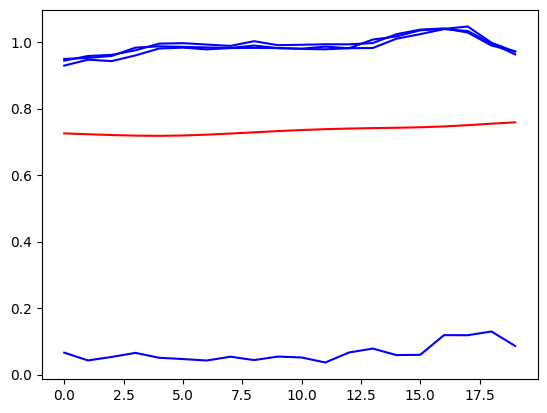

In [31]:
plt.plot(x_test_scaled,c='blue')
plt.plot(yp,c='red')
